In [104]:
import pandas as pd
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_extraction import stop_words
 


In [105]:
#(list(stop_words.ENGLISH_STOP_WORDS))

In [106]:
%%bash


UsageError: %%bash is a cell magic, but the cell body is empty.


In [113]:
whole = pd.read_csv('complete_allbrands_users_captions_list.csv', encoding="latin-1")
whole = whole[whole['followers_count']>10000]
whole = whole[whole['followers_count']<100000]

data = whole

In [114]:
# This is not going to run
user = pd.read_csv('30users.csv')
k = list(user.jenniferyoungstudio)
k.append('jenniferyoungstudio')
k = pd.DataFrame(k, columns= ['username'])
k['joined'] = 1
result = pd.merge(k, data, on='username', how='outer')

"""for i,v in enumerate(k.username):
    print(data[data.username==str(v)])"""
    #### Note to Karan: 
    ### we need to pick our users. They don't match
data = result[result.joined==1]
data = data.dropna(axis=0, how='any')
data = (data.drop_duplicates(subset=['username'], keep='first')).reset_index()


In [115]:
data

,index,username,joined,Unnamed: 0,followers_count,caption
0,0,vanessaballi,1.0,1879.0,19051.0,['Happy Halloween from Han Solo and Princess L...
1,1,lem0n,1.0,698.0,50654.0,['A recent favourite: Chanel Gabrielle - th??n...
2,2,kolorowekredki,1.0,664.0,52403.0,['Bold lips ?? @katarzyna_szafranska \n#bestmu...
3,6,siguemiestilo,1.0,1217.0,61488.0,"['Mi Málaga. Best place in the world ?', 'Cuan..."
4,8,jaclynrjohnson,1.0,800.0,53592.0,['Taking in the Cali sunshine before heading e...
5,9,mlle_michele,1.0,334.0,83842.0,['expose yourself to your deepest fear; after ...
6,10,carole_tolila,1.0,78.0,25364.0,['1ère piñata pour Thelma. Une future @elsa.gr...
7,12,thirlby,1.0,491.0,25121.0,['BEAUTY BITES: DIGESTIVE PICKLED VEGGIES | On...
8,15,gisellelam_theswanker,1.0,642.0,15436.0,['Oral care experience has never been such pro...
9,16,fooderati,1.0,442.0,11147.0,['Loss. Grief. Destruction. Recreation. \nThis...


In [110]:
### if we want to add random

whole = (whole.sample(n=50)).reset_index()

In [111]:
dftest = pd.concat([whole,data])

In [112]:
dftest = dftest.reset_index()

## dataframe and clean

In [116]:
# Milano

userlist=[]
emojis = []
usernameforeachpost  = []
f2post = []
f3post = []

captionsfromsample = dftest
#captionsfromsample.drop(['level_0', 'index', 'Unnamed: 0'], axis =1, inplace = True)

listof = []
for num, singlepost in enumerate(captionsfromsample.caption): 
    ## f1 separates by user. This is each user's total supply of posts
    f1 = singlepost.split("\', \'")

    # take only the first quarter of their text
    total= (len(f1)/4)
    f1 = f1[0:int(total)]

    f3 = []

    #for i in (range(len(f1))):
    #    userlist.append(dftest.username)"""
    
    for j,k in enumerate(f1):

        userlist.append(dftest.username[num])
        
        f2 = (f1[j].replace("\n", " ")).replace("\\", "")
        
        #get emojis
        emoji = re.findall(r'[^\w\s,]', f2)
        emojis.append(emoji)
        
        f2post.append(f2)
        f3post.append(f3)
        f3.append(f2)
        #usernameforeachpost.append(dftest.username[num])

        
print(len(f2), len(f2post), len(f3post), len(emojis), len(userlist))


17 3498 3498 3498 3498


In [117]:
df1991 = pd.DataFrame({'caption': f2post, 'username': userlist, 'emojis': emojis}) 

In [118]:

df1991.to_csv('clean_data.csv', sep=',')

This is working!

In [119]:
df1991['polarity'] = np.zeros(len(df1991.caption))

vectorizer = CountVectorizer(stop_words=list(stop_words.ENGLISH_STOP_WORDS))#min_df=4
df1991['vector'] = vectorizer
corpus = df1991['caption'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = df1991['polarity'].values

## it outputs words
## each line, token column
DF = pd.concat([pd.DataFrame(x), df1991.username], axis=1)


In [98]:
#DF_username = DF.groupby('username').sum(axis=0)

In [99]:
x = x

31

# Kmeans - euclidean

In [79]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

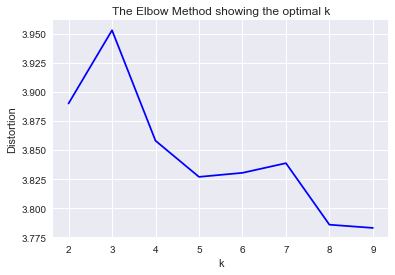

In [80]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
######################

DFclusters.to_csv('DFclusters_eucl.csv', sep=',')
######################
######################

In [ ]:
#print(x.shape)
#y =np.vstack((x,order_centroids))
print('hi')


In [81]:
DFclusters
#list(DFclusters_hamming.listofwordspercluster[4:5])
"""
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")"""

'\nfrom sklearn.manifold import TSNE\n\nX_embedded = TSNE(n_components=2).fit_transform(y)\nX_embedded.shape\n\nplt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")\nplt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")'

# Kmean - hamming

In [120]:
listofwordspercluster = []
#listofwords =[]
clusteritison = []
K=[]
totallist = []
dist = []

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 


for i in range(2,10):
    true_k = i
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(x)
    
    dist.append(sum(np.min(cdist(x, model.cluster_centers_, 'hamming'), axis=1)) / x.shape[0])
    

    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    
    for i in range(true_k):
        #print("Cluster :" , i+1)
        listofwords = []
        for ind in order_centroids[i, :-1]:
            listofwords.append(terms[ind])
        #print(listofwords)
        totallist.append(listofwords)
        #print(totallist)
        #listofwordspercluster.append(listofwords)
        clusteritison.append(int(i+1))
        K.append(true_k)
    
DFclusters_hamming = pd.DataFrame({'K_askedfor': K, 'clusternumber': clusteritison, 'listofwordspercluster':  totallist})

In [71]:
"""
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(y)
X_embedded.shape

plt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")
plt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")"""

'\nfrom sklearn.manifold import TSNE\n\nX_embedded = TSNE(n_components=2).fit_transform(y)\nX_embedded.shape\n\nplt.scatter(X_embedded[0:51,0],X_embedded[0:51,1] , color="r")\nplt.scatter(X_embedded[51:,0],X_embedded[51:,1] , color="b")'

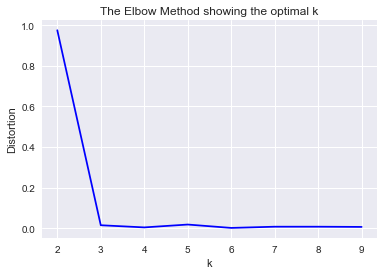

In [121]:
plt.plot(range(2,10), dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [122]:
DFclusters_hamming.to_csv('DFclusters_hamming_second_batch.csv', sep=',')

In [127]:
#DFclusters_hamming
list(DFclusters_hamming.listofwordspercluster[4:5])

[['just',
  've',
  'like',
  'yesterday',
  'username',
  'super',
  'fav',
  'fall',
  'simple',
  'ootd',
  'braid',
  'braids',
  'sooo',
  'weather',
  'happy',
  'cookie',
  'dough',
  'vegan',
  'flannel',
  'youtube',
  'video',
  'love',
  'pic',
  'hair',
  'new',
  'guys',
  'dutch',
  'did',
  'll',
  'uniwigs',
  'fun',
  'fashion',
  'bit',
  'plans',
  'foods',
  'wig',
  'morning',
  'style',
  'styles',
  'money',
  'flannels',
  'recreating',
  'recreate',
  'pictures',
  'buy',
  'fishtail',
  'changed',
  'curls',
  'change',
  'half',
  'lot',
  'day',
  'went',
  'pretty',
  'hairstyles',
  'actually',
  'best',
  'decided',
  'waterfall',
  'posting',
  'got',
  'think',
  'wanted',
  'want',
  'haha',
  'song',
  'jeans',
  'sh10',
  'make',
  'updo',
  'comment',
  'content',
  'hot',
  'awhile',
  'farmers',
  'feel',
  'doing',
  'sure',
  'use',
  'don',
  'hope',
  'code',
  'excited',
  'hairsandstyles',
  'completely',
  'looks',
  'loose',
  'car',
  'tu

# LDA 

In [34]:
tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

In [61]:
"""
from gensim import corpora, models
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)
lda = LdaModel(corpus, num_topics=100)  # train model
print(lda[doc_bow]) # get topic probability distribution for a document"""

'\nfrom gensim import corpora, models\n#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)\nlda = LdaModel(corpus, num_topics=100)  # train model\nprint(lda[doc_bow]) # get topic probability distribution for a document'

In [35]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10

# #Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [36]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda, terms, no_top_words)

Topic 0:
und ich die mothersfinestme mothersfinestblog mamablog blogger_at igersaustria es momblog
Topic 1:
rrn interiordesign instagood mcm instadaily instamood design danielgermanidesigns lux photoftheday
Topic 2:
ng th makeupartist nh mình makeup ch có gi ko
Topic 3:
nan tumblr bom dia china portugal miss halloween grit hechoenespaña
Topic 4:
madamecloth izmir guzelyali cesme alacati fashion trendy madame ve pijama
Topic 5:
de que rrn la vanessamontorostyle vanessamontorocrochet para en handmade no
Topic 6:
by hair stylist fashion escobar manno for styling fashionblogger silk
Topic 7:
u200d instalike est instalove instagood centroestetico sicily nails gel magnetic
Topic 8:
new com summer fashion dolceinvita beachwear style www bikini biquini
Topic 9:
to in of you for my it with is this


# GMM

In [38]:
"""tf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
#vectorizer

from sklearn.mixture import GMM
gmm = GMM(n_components=6).fit((tf).toarray())
labels = gmm.predict(corpus)
plt.scatter(corpus[:, 0], corpus[:, 1], c=labels, s=40, cmap='viridis');"""

"tf = vectorizer.fit_transform(corpus)\nterms = vectorizer.get_feature_names()\n#vectorizer\n\nfrom sklearn.mixture import GMM\ngmm = GMM(n_components=6).fit((tf).toarray())\nlabels = gmm.predict(corpus)\nplt.scatter(corpus[:, 0], corpus[:, 1], c=labels, s=40, cmap='viridis');"

In [39]:
"""def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(gmm, terms, no_top_words)"""

'def display_topics(model, feature_names, no_top_words):\n    for topic_idx, topic in enumerate(model.components_):\n        print("Topic %d:" % (topic_idx))\n        print(" ".join([feature_names[i]\n                        for i in topic.argsort()[:-no_top_words - 1:-1]]))\n\nno_top_words = 10\n#display_topics(nmf, tfidf_feature_names, no_top_words)\ndisplay_topics(gmm, terms, no_top_words)'

In [129]:
whole = pd.read_csv('DFclusters_hamming_final_7.csv', sep=',')

In [130]:
whole

,Unnamed: 0,K_askedfor,clusternumber,listofwordspercluster
0,0,2,1,"['in', 'to', 'of', 'for', 'you', 'my', 'it', '..."
1,1,2,2,"['und', 'ich', 'die', 'mothersfinestme', 'moth..."
2,2,3,1,"['rrn', 'de', 'in', 'by', 'cachefashionshop', ..."
3,3,3,2,"['in', 'to', 'of', 'for', 'my', 'you', 'it', '..."
4,4,3,3,"['in', 'to', 'nduoconcept', 'link', 'bio', 'ta..."
5,5,4,1,"['in', 'to', 'of', 'for', 'you', 'my', 'it', '..."
6,6,4,2,"['rn', 'startuplife', 'publicrelations', 'digi..."
7,7,4,3,"['in', 'to', 'nduoconcept', 'link', 'bio', 'ta..."
8,8,4,4,"['und', 'ich', 'die', 'mothersfinestme', 'moth..."
9,9,5,1,"['to', 'in', 'of', 'my', 'it', 'for', 'link', ..."


In [138]:
list(whole.listofwordspercluster[26:27])

["['to', 'my', 'it', 'of', 'in', 'for', 'you', 'this', 'is', 'with', 'so', 'that', 'on', 'me', 'like', 'your', 'was', 'just', 'but', 'all', 'are', 'have', 'love', 'can', 'today', 'we', 'out', 'from', 'how', 'what', 'by', 'at', 'be', 'get', 'day', 'do', 'about', 'new', 'link', 'pic', 'up', 've', 'one', 'her', 'see', 'more', 'beauty', 'if', 'hair', 'when', 'some', 'life', 'guys', 'because', 'way', 'there', 'into', 'now', 'liketoknow', 'super', 'beautiful', 'got', 'who', 'had', 'will', 'profile', 'braids', 'our', 'want', 'think', 'much', 'feel', 'would', 'off', 'really', 'dutch', 'time', 'she', 'been', 'blonde', 'excited', 'too', 'http', 'still', 'week', 'as', 'am', 'training', 'blog', 'details', 'something', 'ad', 'liketk', 'good', 'best', 'being', 'not', 'happy', 'braid', 'fall', 'look', 'make', 'halloween', 'liketkit', 'go', 'app', 'thanks', 'us', 'morning', 'here', 'know', 'their', 'shop', 'has', 'first', 'fun', 'athleisure', 'll', 'went', 'next', 'fishtail', 'any', 'video', 'also', '

In [167]:
list0 = ['bohochic', 'bohemian', 'blue', 'pompom', 'kimono', 'flowerprint', 'gypset']
#list1= ['love','new', 'available', 'shop', 'like', 'day', 'beautiful', 'just', 'happy', 'fashion', 'today', 'luxury', 'fall', 'collection', 'die', 'october', 'thank', 'shipping', 'wearing', 'inspiration', 'link', 'amazing', 'whatsapp', 'time','make', 'stylelife', 'style', 'luxurydefined', 'best', 'life', 'weekend', 'realestate', 'summer', 'repost', 'hair', 'week', 'good', 'little', 'travel', 'paris', 'makeup', 'night', 'morning', 'beauty', 'world', 'market', 'gallerymarket',]
#list0 = ['propertyoftheday', 'luxury', 'property', 'countryside', 'countryproperties', 'luxurydefined', 'highclassproperties', 'familyhomes', 'countryandtownhouse', 'countrylife', 'realestate', 'luxuryrealestate', 'highclasshomes', 'townproperties', 'available', 'listed', 'today', 'greatbritishhomes', 'countryestate', 'londonproperty', 'house', 'london', 'villa', 'dreamhome', 'listedbuildings', 'househunting', 'homesweethome', 'savills', 'farmhouse', 'home', 'honeymoon', 'houses', 'historichome', 'periodproperty', 'interiors', 'townhouse', 'countryhome', 'staycation', 'lovely', 'knightfrank', 'hotels', 'charming',]
#list0 = ['love', 'fashion', 'beautiful', 'collection', 'new', 'summer', 'design', 'awesome', 'amazing', 'day', 'best', 'kaftan', 'embroidery', 'perfecto', 'like', 'justperfect', 'bahrain', 'dubai', 'kuwait', 'abudhabi', 'saudiarabia', 'caftan', 'oman', 'london', 'enjoyinglife', 'style', 'cyprus', 'time', 'today', 'life', 'veryhappy', 'unique', 'autumn', 'look', 'weekend','dress', 'good', 'fun',]
#list0= ['yesterday', 'super', 'fav', 'fall', 'simple', 'ootd', 'braid', 'braids', 'weather', 'happy', 'cookie', 'dough', 'vegan', 'flannel', 'youtube', 'video', 'love', 'pic', 'hair', 'new', 'guys', 'dutch', 'did', 'morning', 'style', 'styles', 'money', 'flannels', 'recreating', 'recreate', 'pictures', 'buy', 'fishtail', 'changed', 'curls', 'change', 'half', 'lot', 'day', 'went', 'pretty', 'hairstyles', 'actually', 'best', 'decided', 'waterfall', 'posting', 'got', 'think', 'wanted', 'want', 'haha', 'song', 'jeans', 'sh10', 'make', 'updo', 'comment', 'content', 'hot', 'awhile', 'farmers',]
#list0=['startuplife', 'publicrelations', 'digitalpr', 'branding', 'socialmedia', 'startup', 'smallbusiness', 'trilluminati', 'nyfw', 'makeup', 'app', 'kendalljenner', 'travel', 'startupbusiness', 'lanadelrey', 'denim', 'midnight', 'kurtcobain', 'cross', 'style', 'summer', 'lotd', 'harrystyles', 'bellahadid', 'mileycyrus', 'justinbieber', 'dance', 'streetlights', 'gigihadid', 'to', 'fashion', 'beauty', 'blogger', 'capsule', 'beautyblogger', 'blackfriday', 

newlist = []
for i,v in enumerate(list0):
    
    f2 = (v.replace("\'", " ")).replace(",", "")
    print(f2)
    newlist.append(f2)
    

bohochic
bohemian
blue
pompom
kimono
flowerprint
gypset


In [145]:
newlist.replace("\'", " ").replace(",", "")

AttributeError: 'list' object has no attribute 'replace'

In [142]:
#pd.DataFrame(newlist)
(pd.DataFrame(newlist)).to_csv('909090909090909.txt')